# Description generator of video on the basis of title and tags

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("CAvideos.csv")

In [3]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [5]:
#checking for the missing values
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [6]:
len(df)

40881

In [26]:
len(df["description"].unique())

22346

In [27]:
df["description"].isna().sum()

1296

In [28]:
df_cpy = df.copy()

In [29]:
df_cpy["description"].isna().sum()

1296

In [32]:
len(df["description"]!=True)

40881

In [34]:
df_cpy.dropna(how="any",axis=0,inplace = True)

In [37]:
df_cpy.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [38]:
len(df_cpy)

39585

In [39]:
len(df)

40881

In [41]:
df_cpy.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...
40880,POTgw38-m58,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,24,2018-06-13T16:00:03.000Z,"吳宗憲|""吳姍儒""|""小明星大跟班""|""Sandy""|""Jacky wu""|""憲哥""|""中天...",107392,300,62,251,https://i.ytimg.com/vi/POTgw38-m58/default.jpg,False,False,False,藝人：李妍瑾、玉兔、班傑、LaLa、小優、少少專家：陳筱屏(律師)、Wendy(心理師)、羅...


<AxesSubplot:>

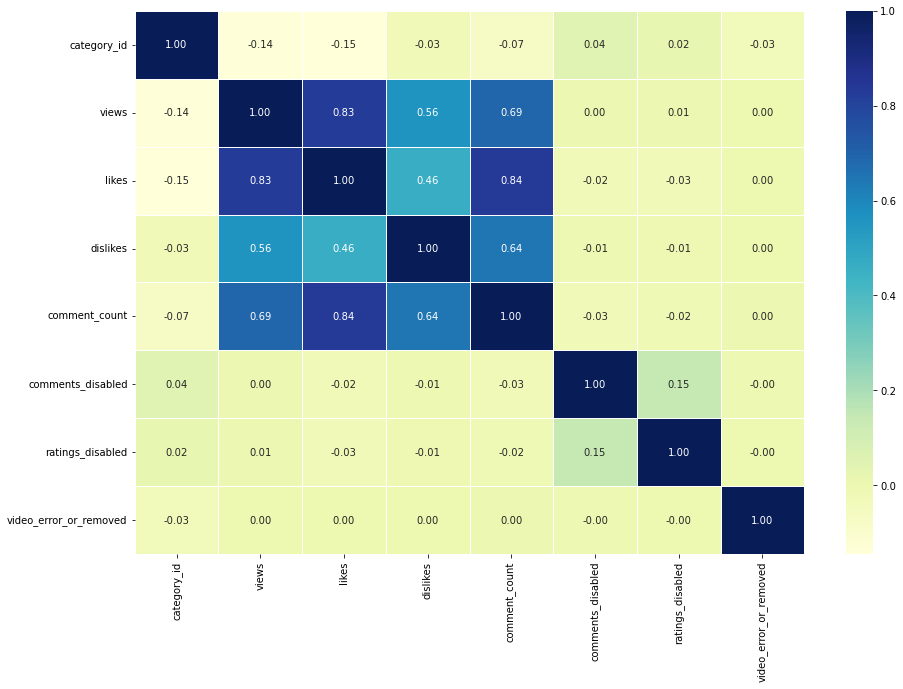

In [42]:
corr_mat = df_cpy.corr()

plt.subplots(figsize = (15,10))
sns.heatmap(corr_mat,
            annot = True,
            linewidth = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu")

In [45]:
df_cpy.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [46]:
df_cpy.drop(["video_id","trending_date","publish_time"],axis = 1,inplace= True)

In [47]:
df_cpy.columns

Index(['title', 'channel_title', 'category_id', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description'],
      dtype='object')

In [48]:
# Find the columns which contains string dtype

for label,content in df_cpy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

title
channel_title
tags
thumbnail_link
description


In [50]:
# This will turn all of the string value into category values

for label, content in df_cpy.items():
    if pd.api.types.is_string_dtype(content):
        df_cpy[label] = content.astype("category").cat.as_ordered()

In [51]:
df_cpy.head(5)

,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [53]:
# check which column have categorical data

for label,content in df_cpy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

title
channel_title
tags
thumbnail_link
description


In [54]:
# Trun categorical variables into numbers and fill missing
for label, content in df_cpy.items():
    if not pd.api.types.is_numeric_dtype(content):
        #turn categories into number and add +1
        df_cpy[label] = pd.Categorical(content).codes + 1

In [55]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39585 entries, 0 to 40880
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   title                   39585 non-null  int16
 1   channel_title           39585 non-null  int16
 2   category_id             39585 non-null  int64
 3   tags                    39585 non-null  int16
 4   views                   39585 non-null  int64
 5   likes                   39585 non-null  int64
 6   dislikes                39585 non-null  int64
 7   comment_count           39585 non-null  int64
 8   thumbnail_link          39585 non-null  int16
 9   comments_disabled       39585 non-null  bool 
 10  ratings_disabled        39585 non-null  bool 
 11  video_error_or_removed  39585 non-null  bool 
 12  description             39585 non-null  int16
dtypes: bool(3), int16(5), int64(5)
memory usage: 3.3 MB


In [56]:
df_cpy.head()

,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,6069,1108,10,2572,17158579,787425,43420,125882,18724,False,False,False,5031
1,13716,4354,23,15194,1014651,127794,1688,13030,636,False,False,False,13628
2,14809,3072,23,15506,3191434,146035,5339,8181,2619,False,False,False,18502
3,8503,4452,24,15975,2095828,132239,1989,17518,15128,False,False,False,7390
4,5968,1084,10,10614,33523622,1634130,21082,85067,1329,False,False,False,22227


In [59]:
## converting boolean column into int

In [57]:
df_cpy = df_cpy.replace({True: 1, False: 0})

In [58]:
df_cpy.head()

,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,6069,1108,10,2572,17158579,787425,43420,125882,18724,0,0,0,5031
1,13716,4354,23,15194,1014651,127794,1688,13030,636,0,0,0,13628
2,14809,3072,23,15506,3191434,146035,5339,8181,2619,0,0,0,18502
3,8503,4452,24,15975,2095828,132239,1989,17518,15128,0,0,0,7390
4,5968,1084,10,10614,33523622,1634130,21082,85067,1329,0,0,0,22227


In [60]:
#spliting the data

X = df_cpy.drop(["description"],axis = 1)
y = df_cpy["description"]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [63]:
print("X_train shape :",X_train.shape)
print("X_test shape  :",X_test.shape)
print("Y_train shape :",y_train.shape)
print("Y_test shape  :",y_test.shape)

X_train shape : (27709, 12)
X_test shape  : (11876, 12)
Y_train shape : (27709,)
Y_test shape  : (11876,)


In [64]:
from sklearn.ensemble import RandomForestRegressor

#Instantiate model
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 21)

#Fit the model
model.fit(X,y)

RandomForestRegressor(n_jobs=-1, random_state=21)

In [65]:
# Score the model

model.score(X,y)

0.9437969086113493

In [66]:
# evaluation function

from sklearn.metrics import mean_absolute_error,r2_score

In [69]:
def show_scores(model):
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    scores = {"Training MAE":mean_absolute_error(y_train,train_preds),
              "Validation MAE":mean_absolute_error(y_test,test_preds),
        
              "Training R^2":r2_score(y_train, train_preds),
              "Validation R^2":r2_score(y_test, test_preds)}
    return scores

In [70]:
show_scores(model)

{'Training MAE': 1066.7210465913602,
 'Validation MAE': 1067.1267042775344,
 'Training R^2': 0.94377182124726,
 'Validation R^2': 0.9438477618188864}

In [73]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,8],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,1),
           "max_features":[0.5,1,"sqrt", "auto"]}

# Instantiate RandomizedSearchCV model

ran_cv = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                  random_state = 16),
                            param_distributions = rf_grid,
                            n_iter = 3,
                            cv = 5,
                            verbose = True)

ran_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=16),
                   n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 8],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [74]:
#find the best model hyperparameter

ran_cv.best_params_

{'n_estimators': 30,
 'min_samples_split': 12,
 'min_samples_leaf': 12,
 'max_features': 'auto',
 'max_depth': None}

In [75]:
#evaluate model

show_scores(ran_cv)

{'Training MAE': 3234.233074235003,
 'Validation MAE': 3978.4896616487717,
 'Training R^2': 0.5872034389040552,
 'Validation R^2': 0.38166059233852967}

In [76]:
tune_model = RandomForestRegressor(n_jobs = -1,
                                   n_estimators = 30,
                                   min_samples_split = 12,
                                   min_samples_leaf = 12,
                                   max_features = "auto",
                                   max_depth = None)

tune_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=12, min_samples_split=12,
                      n_estimators=30, n_jobs=-1)

In [77]:
show_scores(tune_model)

{'Training MAE': 3257.63258145184,
 'Validation MAE': 4016.851830117434,
 'Training R^2': 0.5827412109350999,
 'Validation R^2': 0.3757995098418011}

In [88]:
#Instantiate model
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 21)

#Fit the model
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=21)

In [89]:
model.score(X_test,y_test)

0.5257616270435901

In [78]:
import xgboost

In [83]:
from xgboost import XGBRegressor
# define model
model = XGBRegressor()

In [84]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [85]:
# Predict the model
pred = model.predict(X_test)

In [87]:
# RMSE Computation

from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  5083.588867


In [90]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid = {"learning_rate":[0.2,0.5],
              "subsample":[0.3,0.6,0.9],
              "gamma":[0,1]}

xgb_model = XGBRegressor(max_depth = 3,n_estimators = 200,eval_metric= 'logloss')

#cv model
cv_model = GridSearchCV(xgb_model,
                        param_grid = param_grid,
                        cv = 3,
                        scoring = "r2",
                        return_train_score = True,
                        verbose = 1
                        )

In [94]:
#Fit the model

cv_model.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='logloss', gamma=None,
                                    gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    ma...elta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_es

In [95]:
cv_model.best_params_

{'gamma': 0, 'learning_rate': 0.5, 'subsample': 0.9}

In [96]:
mod_params = {'learning_rate': 0.5,
          'max_depth': 3, 
          'n_estimators':200,
          'subsample':0.9}

# fit model on training data
model = XGBRegressor(params = mod_params)

model.fit(X_train, y_train)

[23:14:51] WARNING: ../src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1,
             params={'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200,
                     'subsample': 0.9},
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [97]:
#prediction

y_preds = model.predict(X_test)

In [100]:
rmse = np.sqrt(MSE(y_test, y_preds))
print("RMSE : % f" %(rmse))

RMSE :  5083.588867
